<a href="https://colab.research.google.com/github/Strojove-uceni/2024-final-letadylka-prochazka-belohlavek/blob/main/Coordinates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coordinates
- loads coordinates
- transforms them
- builds a distance matrix
- builds a adjacency matrix with n-nearest neighbors

In [ ]:
# Libraries
import re
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json

# Define the file path
file_path = '/content/drive/My Drive/sparse_points.json'  # Ensure this path matches where the file is saved

# Load sparse_points from the JSON file
with open(file_path, 'r') as f:
    sparse_points = [tuple(point) for point in json.load(f)]  # Convert lists back to tuples

print(f"Sparse points loaded: {sparse_points}")

Sparse points loaded: [(1835.0560519110775, 5467.207443275965), (1414.2141420410462, 5588.28636340004), (1996.9373326177808, 5515.484573927478), (1559.416183751066, 5564.286791732589), (1681.576165661963, 5591.776648597494), (1781.2500624069605, 5553.754161180979), (1515.0926504913598, 5451.57837858648), (1628.3261507910686, 5437.617237796663), (1614.5194473993695, 5692.438944690442), (1621.8397800701364, 5804.06629604973), (1327.7291990952783, 5711.280307260771), (1485.1009077769525, 5703.558437354899), (1462.9236974072878, 5805.270907755048), (1230.9278379552652, 5653.335395487107), (946.7321379395472, 5501.091008422932), (965.2646257136402, 5674.863968784679), (1138.5742738810343, 5336.090092274257), (1270.1549370770954, 5362.776874668951), (1414.8010041538923, 5381.402024881913), (1198.7430841875903, 5460.999059871644), (1367.296060492967, 5473.292276761793), (1294.154508744546, 5558.016633369021), (1108.2118814111452, 5520.611895544977), (947.596987369005, 5334.391280894964), (175

In [ ]:

# Calculate the distance between two places
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0

    # Convert degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Differences in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in km
    distance = R * c
    return distance

# def convert_to_decimal_degrees(coord):
#     # Extract degrees, minutes, and direction for latitude and longitude
#     lat_deg = int(coord[0:2])
#     lat_min = int(coord[2:4])
#     lat_sec = int(coord[4:6])
#     lat_dir = coord[6]

#     lon_deg = int(coord[7:10])
#     lon_min = int(coord[10:12])
#     lon_sec = int(coord[12:14])
#     lon_dir = coord[14]

#     # Convert to decimal degrees
#     lat_decimal = lat_deg + (lat_min / 60) + (lat_sec / 3600)
#     lon_decimal = lon_deg + (lon_min / 60) + (lon_sec / 3600)

#     # Adjust for N/S and E/W
#     if lat_dir == 'S':
#         lat_decimal = -lat_decimal
#     if lon_dir == 'W':
#         lon_decimal = -lon_decimal

#     return lat_decimal, lon_decimal
# char_points = '/content/drive/My Drive/SU2/CHARACTERISTIC_POINTS.txt'


# coordinate_pattern = r'\d{6}[NS]\d{7}[EW]'

# coordinates_text = [] # Will contain tuples of int, Latitude and Longitude


# amount_to_read = 10000
# k = 0
# # Load data from a file
# with open(char_points, 'r') as f:
#     for line in f:
#       matches = re.findall(coordinate_pattern, line)
#       if matches != []:
#         coordinates_text.append(matches[0])
#         k += 1
#       if k >= amount_to_read:
#         break

number_of_points = len(sparse_points)



# # Convert to numbers
# coordinates = []
# for coord in coordinates_text:
#   lat, lon = convert_to_decimal_degrees(coord) # Converth positions to numbers
#   coordinates.append((lat, lon))

# Initialize distance matrix
distance_matrix = np.zeros((number_of_points, number_of_points))

# Build distance matrix
for i in range(number_of_points):
  for j in range(number_of_points):
    if i != j:
      lat1, lon1 = sparse_points[i]
      lat2, lon2 = sparse_points[j]
      distance_matrix[i, j] = ((lat1-lat2)**2 +(lon1 - lon2)**2)**0.5     #haversine(lat1, lon1, lat2, lon2)

# Initialize adjecency matrix
adjacency_matrix = np.zeros((number_of_points, number_of_points))

# Find 5 closest neighbors
n = 5
for i in range(number_of_points):
  sorted_neighbors = np.argsort(distance_matrix[i])[1:n+1] # Have to take 1 to n, because index 0 is the node itself
  for neighbor in sorted_neighbors:
    adjacency_matrix[i, neighbor] = 1  # Fill in the adjacency matrix

# Replace diagonal elements with zero
np.fill_diagonal(adjacency_matrix, 0)
print(adjacency_matrix)

# # Save the matricies into csv
# np.savetxt('/content/drive/MyDrive/SU2/full_dist_mat.csv', distance_matrix, delimiter=',')
# np.savetxt('/content/drive/MyDrive/SU2/full_ad_mat.csv', adjacency_matrix, delimiter=',')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


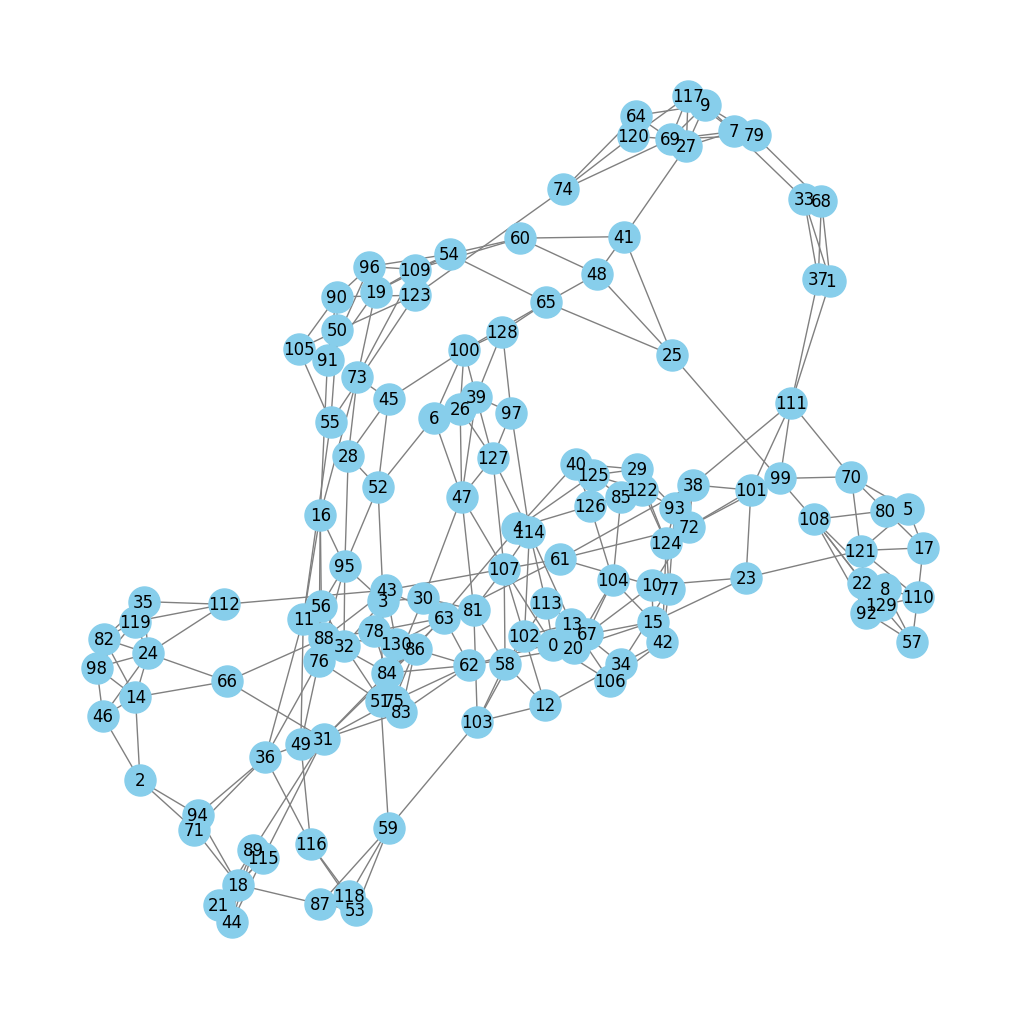

In [ ]:
# Visualizing the created graph
G = nx.from_numpy_array(adjacency_matrix ) # Create a graph
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G) # Layout for positioning nodes
# pos = nx.circular_layout(G) # Layout for positioning nodes
nx.draw(G, pos, with_labels= True, node_color='skyblue', node_size=500, edge_color='gray')
plt.show()

